In [90]:
import matplotlib.pyplot as plt
def create_plots(X, Y, Z, Z1, cm='viridis'):
    '''
    This function is given in order to help you visualize your results more quickly
    Plots Z(x,y) and Z1(x,y). Colors are based on the range and colormap given as inputs
    '''
    fig = plt.figure(figsize=(10,10), dpi=150)

    ax1 = fig.add_subplot(2,1,1)
    #ax1.set_aspect('equal')
    #ax1.xaxis.tick_top()
    #ax1.xaxis.set_label_position('top') 
    #ax1.invert_yaxis()
    levels = np.linspace(int(np.min(Z)),int(np.max(Z)),15)
    #ticks = np.linspace(colorrange[0],colorrange[1],11)
    cntr = ax1.contourf(X, Y, Z, levels, cmap=cm)
    ax1.contour(X, Y, Z, levels, colors='w')
    ax1.set_xlabel('x')                                     
    ax1.set_ylabel('y')
    #ax1.set_title('Stream function')
    cbar = fig.colorbar(cntr)
    #cbar.set_ticks(ticks)
    cbar.set_label('Stream function')
                                  
    ax2 = fig.add_subplot(2,1,2)  
    cntr = ax2.contourf(X, Y, Z1, cmap=cm)
    ax2.set_xlabel('x')                                     
    ax2.set_ylabel('y')
    #ax1.set_title('vorticity')
    cbar = fig.colorbar(cntr)
    #cbar.set_ticks(ticks)
    cbar.set_label('vorticity')

    return [ax1, ax2] 

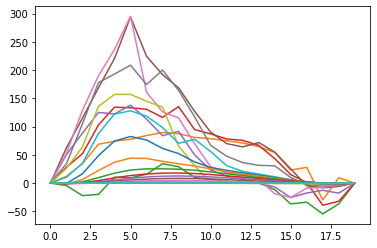

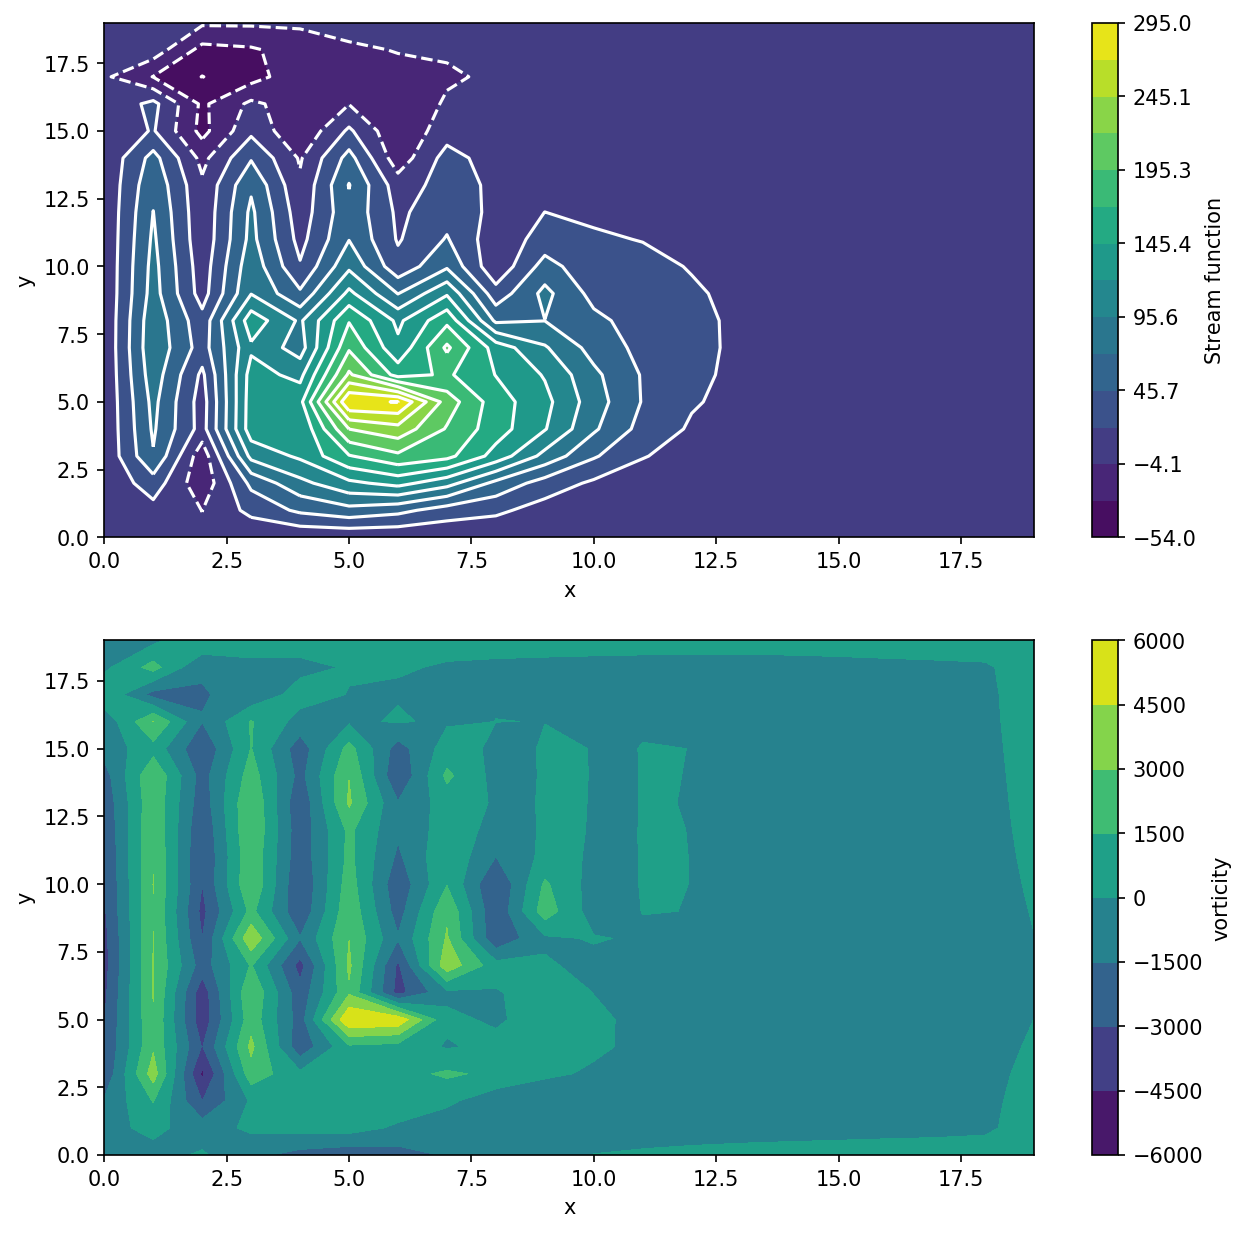

In [117]:
import numpy as np                                  

def solve_lid_cavity_flow(box_size=20, nu=1., max_t = 25000, u_wall = 1, dt = 0.0001):
    def bc_stream_function():  
        u[0,:]  = 0
        u[-1,:] = 0
        u[:,0]  = 0
        u[:,-1] = 0  

        return 

    def converge_stream_function(it_max = 3000): 
        nonlocal u
        nonlocal w
        ''' Update the stream function '''
        
        u_old = u.copy()
        for it in range(it_max):
            up = np.roll(u.copy(), 1, axis=0)
            down = np.roll(u.copy(), -1, axis=0)
            left = np.roll(u.copy(), 1, axis=1)
            right = np.roll(u.copy(), -1, axis=1)

            u = (up+down+left+right+w*h**2)/4 
            bc_stream_function()
            
            # Convergence condition
            if np.linalg.norm(u_old - u, np.inf) < 0.01:
                break
            u_old = u   
        return
    
    def vorticity_on_boundaries():
        nonlocal w
        nonlocal u
        
        # top wall
        w[0,:] = (u[0,:] - u[1,:]) * (2/h**2) + u_wall * (2/h)
        
        # bottom wall
        w[-1,:] = (u[-1,:] - u[-2,:]) * (2/h**2)
        
        # left wall
        w[:,0] = (u[:,0] - u[:,1]) * (2/h**2)
        
        # right wall
        w[:,-1] = (u[:,-1] - u[:,-2]) * (2/h**2) 
        
    def update_vorticity():
        nonlocal w
        nonlocal u
        nonlocal Re
        
        u_up = np.roll(u.copy(), 1, axis=0)
        u_down = np.roll(u.copy(), -1, axis=0)
        u_left = np.roll(u.copy(), 1, axis=1)
        u_right = np.roll(u.copy(), -1, axis=1)
        
        w_up = np.roll(w.copy(), 1, axis=0)
        w_down = np.roll(w.copy(), -1, axis=0)
        w_left = np.roll(w.copy(), 1, axis=1)
        w_right = np.roll(w.copy(), -1, axis=1)
        
        # Central Differences
        dwdt = -(u_right - u_left)*(w_down - w_up)/(2*h) \
        + (u_down - u_up)*(w_right - w_left)/(2*h) \
        + (1/Re)*(w_up+w_down+w_left+w_right+4*w)/(h**2)
        
        # Forward Euler
        w += dt*dwdt
        
        vorticity_on_boundaries()
    
    # Reynold number, normal units
    Re = 1000#V0*h/nu 

    # Initialize the Stream and Vorticity functions
    u = np.zeros((box_size,box_size)) # Stream function
    w = np.zeros((box_size,box_size)) # Vorticity
    
    h = 1/(box_size)
    
    if dt/(Re*h**2) > 0.25:
        raise Exception("dt/(Re*h^2) > 0.25 \t {}/{}*{}^2 = {}".format(dt, Re, h, dt/(Re*h**2)))
    
    # Time to solve the equations!                                               #complete this part
    omega = 0.1
    
    vorticities = []
    stream_functions = []
    
    vorticity_on_boundaries()
    
    for t in range(max_t):
        
        converge_stream_function()
        vorticity_on_boundaries()
        update_vorticity()
        
        vorticities.append(w)
        stream_functions.append(u)

    # Put stream function in V0h units
    u /= h
#     for  i in range (0, Nxmax+1):   
#         for  j in range(0,Nymax+1 ):   
#             u[i,j] = u[i,j]/(V0*h)
    # Properly write out the results for plotting
    x = np.arange(box_size); y = np.arange(box_size)
    X, Y = np.meshgrid(x,y)
    U = u[X,Y]
    W = w[X,Y]
    
    u_up = np.roll(u.copy(), 1, axis=0)
    u_down = np.roll(u.copy(), -1, axis=0)
    u_left = np.roll(u.copy(), 1, axis=1)
    u_right = np.roll(u.copy(), -1, axis=1)
    
    v_x = (u_left - u_right)/(2*h)
    v_y = (u_down - u_up)/(2*h)

    return X, Y, U, W, v_x, v_y, vorticities, stream_functions


X, Y, U, W, v_x, v_y, vorticities, stream_functions = solve_lid_cavity_flow()
plt.plot(U)
create_plots(X, Y, U, W)
          

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.09856186, 0.06101597, 0.03993291, 0.02851154,
        0.02151457, 0.0167927 , 0.013383  , 0.01080153, 0.00877974,
        0.00715578, 0.00582504, 0.00471582, 0.00377629, 0.00296726,
        0.00225782, 0.00162257, 0.00103988, 0.00049158, 0.        ],
       [0.        , 0.13875176, 0.10200632, 0.07357949, 0.05515735,
        0.04267147, 0.03375892, 0.02711404, 0.02198701, 0.01792435,
        0.01463669, 0.01192955, 0.00966578, 0.00774427, 0.00608737,
        0.00463314, 0.00333031, 0.00213492, 0.00100991, 0.        ],
       [0.        , 0.15585313, 0.12598275, 0.0972497 , 0.07607309,
        0.06041605, 0.04858363, 0.03942787, 0.03218933, 0.02635996,
        0.02159083, 0.01763438, 0.01430881, 0

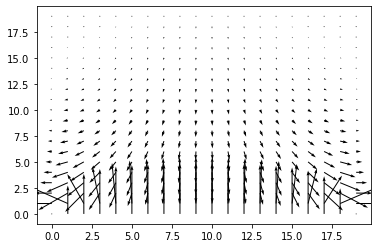

In [109]:
# x = np.arange(20+1); y = np.arange(20+1)
# X, Y = np.meshgrid(x,y)
# U = v_x[X,Y]
# W = v_y[X,Y]

plt.quiver(X, Y, v_x, v_y)

#create_plots(X, Y, v_x, v_y)
U

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.

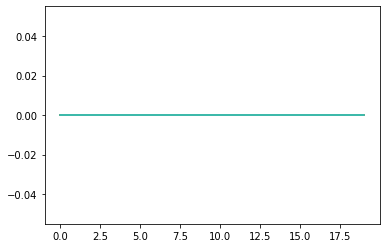

In [119]:
def solve_lid_cavity_flow_2(box_size=20, nu=1., max_t = 60, u_wall = 1, dt = 0.02):
    beta = 1.5
    visc = 0.1
    max_error = 0.001
    
    u = np.zeros((box_size, box_size))
    w = np.zeros((box_size, box_size))
    
    h = 1/(box_size-1)
    
    # Loop over time
    for t in range(max_t):
        
        # Converge stream function
        for it in range(300):
            u_old = u.copy()
            for i in range(1, box_size-1):
                for j in range(1, box_size-1):
                    u[i,j] = 0.25*beta*(u[i+1,j]+u[i-1,j]+u[i,j+1]+u[i,j-1]+w[i,j]*h**2)+(1-beta)*u[i,j]
            error = 0
            
            print(u)
            
            for i in range(box_size):
                for j in range(box_size):
                    error += abs(u_old[1,j]-u[i,j])
            if error <= max_error: 
                break
        
        # Update vorticity at borders
        w[1:box_size-2,0]           = -2*u[1:box_size-2,1]/h**2 # bottom wall
        w[1:box_size-2, box_size-1] = -2*u[1:box_size-2, box_size-2]/h**2 - 2/h # top wall
        w[0,1:box_size-2]           = -2*u[1,1:box_size-2]/h**2 # right wall
        w[box_size-1,1:box_size-2]  = -2*u[box_size-2,1:box_size-2]/h**2 # left wall
        
        # Compute RHS
        for i in range(1, box_size-1):
            for j in range(1, box_size-1):
                u_old[i,j] = (-0.25*((u[i,j+1]-u[i,j-1])*(w[i+1,j]-w[i-1,j]) \
                                    -(u[i+1,j]-u[i-1,j])*(w[i,j+1]-w[i,j-1]))/h**2 \
                              +visc*(w[i+1,j]+w[i-1,j]+w[i,j+1]+w[i,j-1]-4*w[i,j])/h**2)
        # update vorticity
        w[1:box_size-2, 1:box_size-2] += dt*u_old[1:box_size-2, 1:box_size-2] 
        
        #print(u)
        #print(w)
        
        # Put stream function in V0h units
    #u /= h
#     for  i in range (0, Nxmax+1):   
#         for  j in range(0,Nymax+1 ):   
#             u[i,j] = u[i,j]/(V0*h)
    # Properly write out the results for plotting
    x = np.arange(box_size); y = np.arange(box_size)
    X, Y = np.meshgrid(x,y)
    U = u[X,Y]
    W = w[X,Y]
    
    u_up = np.roll(u.copy(), 1, axis=0)
    u_down = np.roll(u.copy(), -1, axis=0)
    u_left = np.roll(u.copy(), 1, axis=1)
    u_right = np.roll(u.copy(), -1, axis=1)
    
    v_x = (u_left - u_right)/(2*h)
    v_y = (u_down - u_up)/(2*h)

    return X, Y, U, W, v_x, v_y#, vorticities, stream_functions


X, Y, U, W, v_x, v_y = solve_lid_cavity_flow_2()
#create_plots(X, Y, U, W)
plt.plot(U)
